In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# adj_mat = np.matrix([
#     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
#     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
#     [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
#     [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
#     [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], 
#     [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], 
#     [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0], 
#     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
#     [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 
#     [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], 
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], 
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], 
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# ])

adj_mat = np.matrix([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
    [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], 
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
])

In [3]:
# labels = { 0 : "a", 1 : "b", 2 : "c", 3 : "d", 4 : "e", 5 : "f", 6 : "g", 7 : "h", 8 : "i", 9 : "j", 10 : "k",
#            11 : "l", 12 : "m", 13 : "n"}
labels = { 0 : "a", 1 : "b", 2 : "c", 3 : "d", 4 : "e", 5 : "f", 6 : "g", 7 : "h", 8 : "i", 9 : "j", 10 : "k",
           11 : "l"}

In [4]:
graph = nx.from_numpy_matrix(adj_mat, create_using=nx.DiGraph)

In [5]:
graph = nx.relabel_nodes(graph, labels)

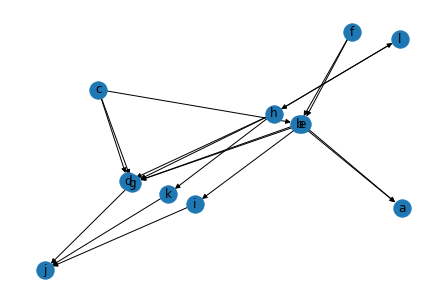

In [9]:
nx.draw_kamada_kawai(graph, with_labels=True )
plt.show()

In [10]:
hubs, auths = nx.hits(graph)

### Authority centralities

In [11]:
for k, v in auths.items():
    print(k, round(v, 6))

a 0.135129
b 0.097908
c 0.0
d 0.176821
e 0.015908
f 0.0
g 0.31195
h 0.0
i 0.072641
j 0.0
k 0.094822
l 0.094822


### Hub Centralities

In [12]:
for k, v in hubs.items():
    print(k, round(v, 6))

a 0.0
b 0.190594
c 0.250107
d 0.0
e 0.221562
f 0.048521
g 0.0
h 0.289215
i 0.0
j 0.0
k 0.0
l 0.0


In [10]:
# def hits(graph, iterations, tolarance=1.0e-8):
#     hubs = dict.fromkeys(graph, 1.0 / graph.number_of_nodes())
#     authorities = {}
#     # power iteration, which stops after given iterations or reaching tolerance
#     for _ in range(iterations):
#         last_hubs = hubs
#         hubs = dict.fromkeys(last_hubs.keys(), 0)
#         authorities = dict.fromkeys(last_hubs.keys(), 0)
#         for node in hubs:
#             for neighbor in graph[node]:
#                 authorities[neighbor] += last_hubs[node] * graph[node][neighbor].get('weight', 1)
#         for node in hubs:
#             for neighbor in graph[node]:
#                 hubs[node] += authorities[neighbor] * graph[node][neighbor].get('weight', 1)
#         scaling = 1.0 / max(hubs.values())
#         for node in hubs:
#             hubs[node] *= scaling
#         scaling = 1.0 / max(authorities.values())
#         for node in authorities:
#             authorities[node] *= scaling
#         err = sum([abs(hubs[node] - last_hubs[node]) for node in hubs])
#         if err < tolarance:
#             break
#     return hubs, authorities

In [11]:
# hubs, auths = hits(graph, 100)

In [12]:
# for k, v in auths.items():
#     print(k, round(v, 3))